## Importing the python module

In [122]:
#Data Analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O


#Seaborn and Matplotlib Visualization
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib

#Machine Learning
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
 

#Additional
from datetime import datetime
import holidays
ger_holidays = holidays.Germany()

In [123]:
df=pd.read_excel('D:/D.A/Proj1/Call center optimization/Sample1.xlsx',parse_dates=True, squeeze=True)
test=pd.read_excel('D:/D.A/Proj1/Call center optimization/test.xlsx',parse_dates=True, squeeze=True)

In [124]:
df.head()

,From,Offered_Calls,Type,CW
0,2012-01-01 00:15:00,2.823537,1,1
1,2012-01-01 00:30:00,4.234691,1,1
2,2012-01-01 01:30:00,4.234705,1,1
3,2012-01-01 03:00:00,2.823237,1,1
4,2012-01-01 03:45:00,1.835689,1,1


In [125]:
test.head()

,Date,Offered_Calls
0,2019-09-30,NaN
1,2019-10-01,NaN
2,2019-10-02,NaN
3,2019-10-03,NaN
4,2019-10-04,NaN


In [126]:
df['Date'] = pd.to_datetime(df['From']).dt.date

In [127]:
df.head()

,From,Offered_Calls,Type,CW,Date
0,2012-01-01 00:15:00,2.823537,1,1,2012-01-01
1,2012-01-01 00:30:00,4.234691,1,1,2012-01-01
2,2012-01-01 01:30:00,4.234705,1,1,2012-01-01
3,2012-01-01 03:00:00,2.823237,1,1,2012-01-01
4,2012-01-01 03:45:00,1.835689,1,1,2012-01-01


In [128]:
df=df.groupby(['Date'])['Offered_Calls'].sum().reset_index()

In [129]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Week'] = pd.to_datetime(df['Date']).dt.week
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['WeekDay'] = pd.to_datetime(df['Date']).dt.dayofweek




In [130]:
test['Date'] = pd.to_datetime(test['Date']).dt.date
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['WeekDay'] = pd.to_datetime(test['Date']).dt.dayofweek

In [131]:
df.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay
0,2012-01-01,656.327485,2012,52,1,6
1,2012-01-02,6602.360708,2012,1,2,0
2,2012-01-03,6519.576812,2012,1,3,1
3,2012-01-04,6701.000518,2012,1,4,2
4,2012-01-05,6192.670707,2012,1,5,3


In [132]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2738 rows and 6 columns


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2738 non-null   object 
 1   Offered_Calls  2738 non-null   float64
 2   Year           2738 non-null   int64  
 3   Week           2738 non-null   int64  
 4   Day            2738 non-null   int64  
 5   WeekDay        2738 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 128.5+ KB


There are no missing values in the dataset


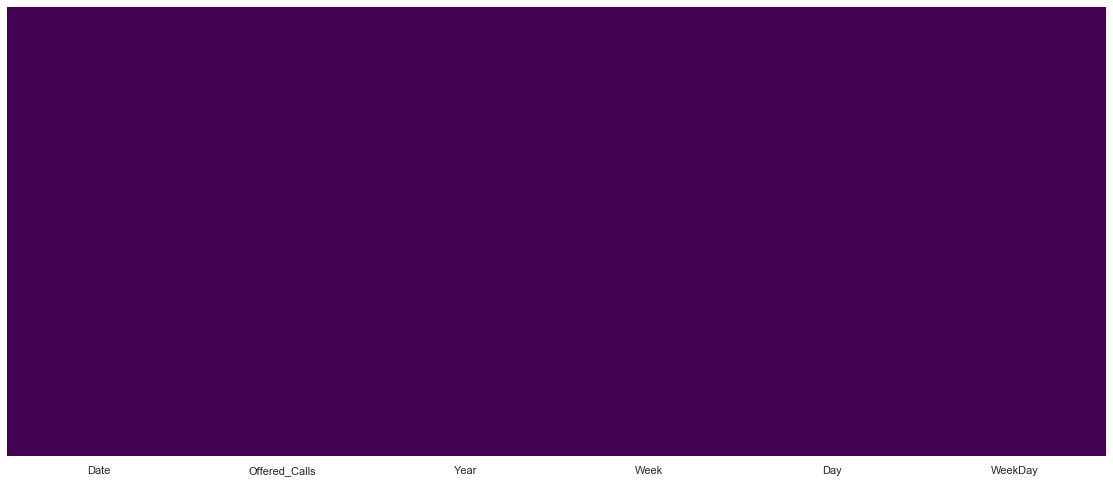

In [134]:
#finding count of total null values in each column

sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('There are no missing values in the dataset')


In [135]:
df.isna().sum()

Date             0
Offered_Calls    0
Year             0
Week             0
Day              0
WeekDay          0
dtype: int64

In [136]:
df.describe()

,Offered_Calls,Year,Week,Day,WeekDay
count,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000
mean,3690.356597,2015.496348,25.423302,15.722790,3.001096
std,2416.314739,2.186789,14.807082,8.798616,2.000822
min,227.050234,2012.000000,1.000000,1.000000,0.000000
25%,2061.621653,2014.000000,13.000000,8.000000,1.000000
50%,3010.135749,2015.000000,25.000000,16.000000,3.000000
75%,4694.192627,2017.000000,37.000000,23.000000,5.000000
max,11071.761271,2019.000000,53.000000,31.000000,6.000000


## Exploratory Data Analysis

count     2738.000000
mean      3690.356597
std       2416.314739
min        227.050234
25%       2061.621653
50%       3010.135749
75%       4694.192627
max      11071.761271
Name: Offered_Calls, dtype: float64


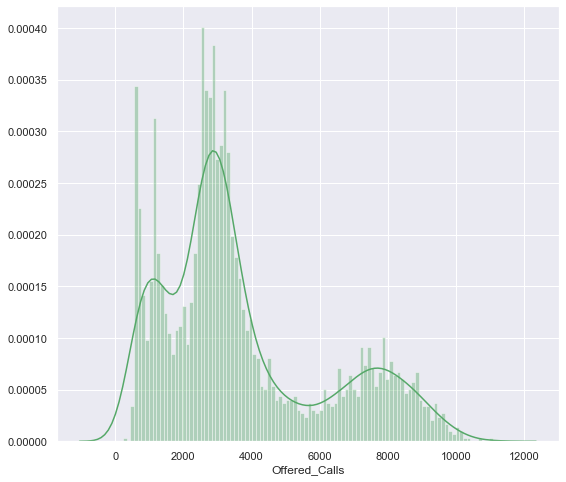

In [137]:
print(df['Offered_Calls'].describe())

plt.figure(figsize=(9, 8))
sns.distplot(df['Offered_Calls'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [138]:
event_dictionary ={ 1 : 1.176, 2 : 1.107, 3 : 1.069, 4 : 1.037, 5 : 0.991, 6 : 0.971 , 7 : 0.973, 8 : 0.978 , 9
                  : 0.977, 10 : 0.983 , 11 : 1.009 , 12 : 1.009, 13 : 1.022,  14 : 1.000, 15: 0.983 , 16 : 0.976
                  ,17: 0.957, 18 : 0.933, 19 : 0.924 , 20 : 0.918 , 21 : 0.928 , 22 : 0.931 , 23 : 0.931 , 24 : 0.935
                  ,25 : 0.945, 26 : 0.956 , 27 : 0.976, 28 : 1.010, 29 : 1.074 , 30 : 1.172, 31 : 1.222}

In [139]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

In [140]:
df['Weights'] = df['Day'].apply(set_value, args =(event_dictionary, )) 
test['Weights'] = test['Day'].apply(set_value, args =(event_dictionary, )) 

In [141]:
df.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights
0,2012-01-01,656.327485,2012,52,1,6,1.176
1,2012-01-02,6602.360708,2012,1,2,0,1.107
2,2012-01-03,6519.576812,2012,1,3,1,1.069
3,2012-01-04,6701.000518,2012,1,4,2,1.037
4,2012-01-05,6192.670707,2012,1,5,3,0.991


In [148]:
df['Holiday'] = df['Date'].isin(ger_holidays)
test['Holiday'] = test['Date'].isin(ger_holidays)

In [149]:
df=df[df['Holiday']==False]
test=test[test['Holiday']==False]

In [150]:
df['SpecialDay']=df.Day.isin([1,2,3,28,29,30,31]).astype(int)
test['SpecialDay']=test.Day.isin([1,2,3,28,29,30,31]).astype(int)

In [151]:
df['Weekend']=df.WeekDay.isin([5,6]).astype(int)
test['Weekend']=test.WeekDay.isin([5,6]).astype(int)

In [152]:
df.drop(['Holiday'],axis=1,inplace=True)
test.drop(['Holiday'],axis=1,inplace=True)

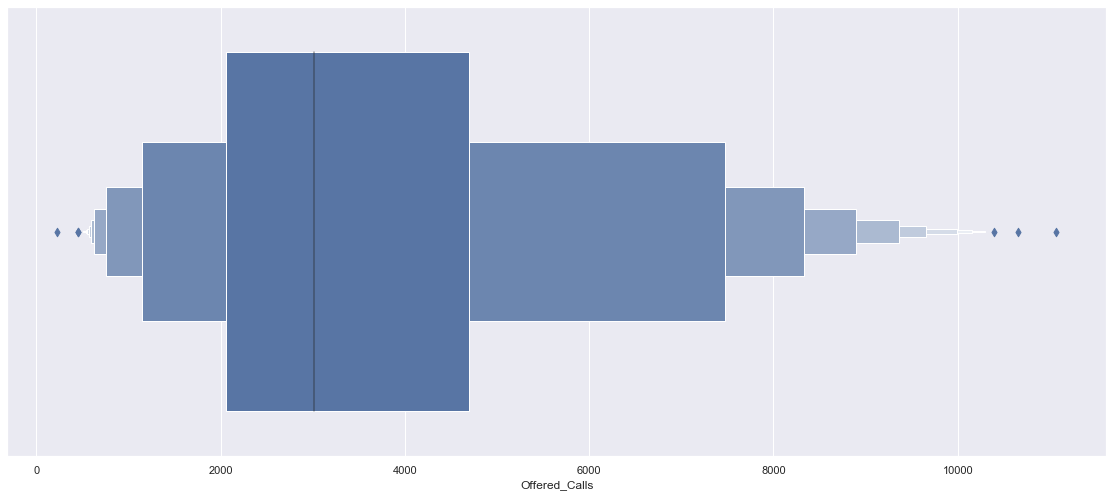

In [153]:
import seaborn as sns
sns.boxenplot(x=df['Offered_Calls'])

In [154]:
df.Offered_Calls.quantile([0.25,0.5,0.75])

0.25    2061.621653
0.50    3010.135749
0.75    4694.192627
Name: Offered_Calls, dtype: float64

[array([2061.62165345,  227.05023431]), array([4694.19262734, 8637.09249034])]

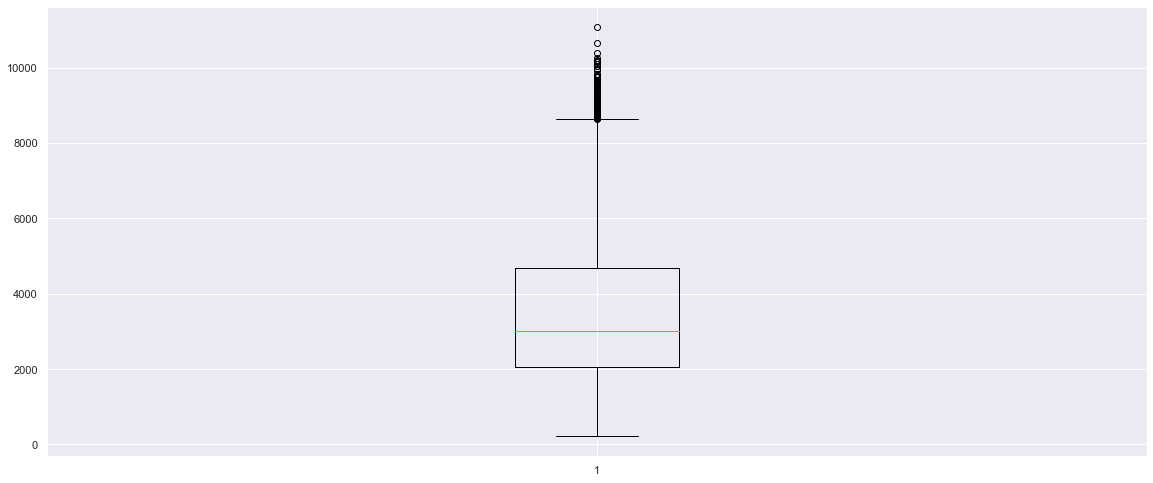

In [155]:
B=plt.boxplot(df['Offered_Calls'])
[item.get_ydata() for item in B['whiskers']]

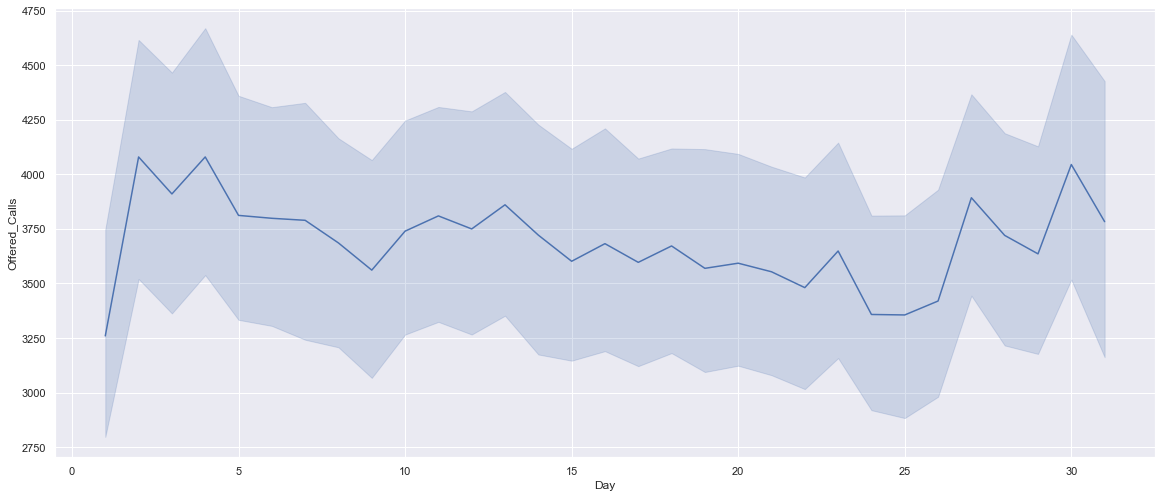

In [156]:
## Daily trends
sns.lineplot(df['Day'],df['Offered_Calls'])

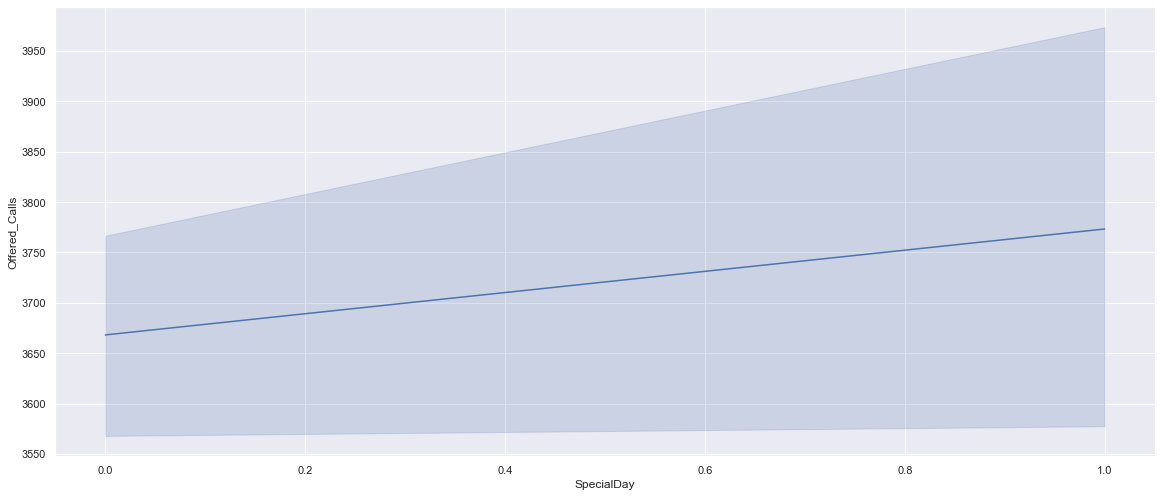

In [157]:
## SpecialDay Trends
sns.lineplot(df['SpecialDay'],df['Offered_Calls'])

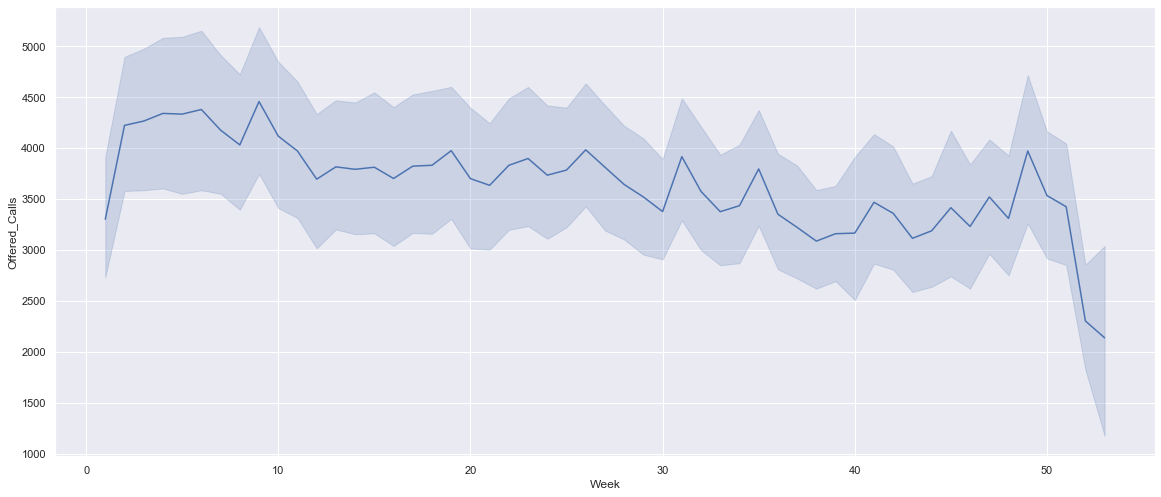

In [158]:
## Week Trends
sns.lineplot(df['Week'],df['Offered_Calls'])

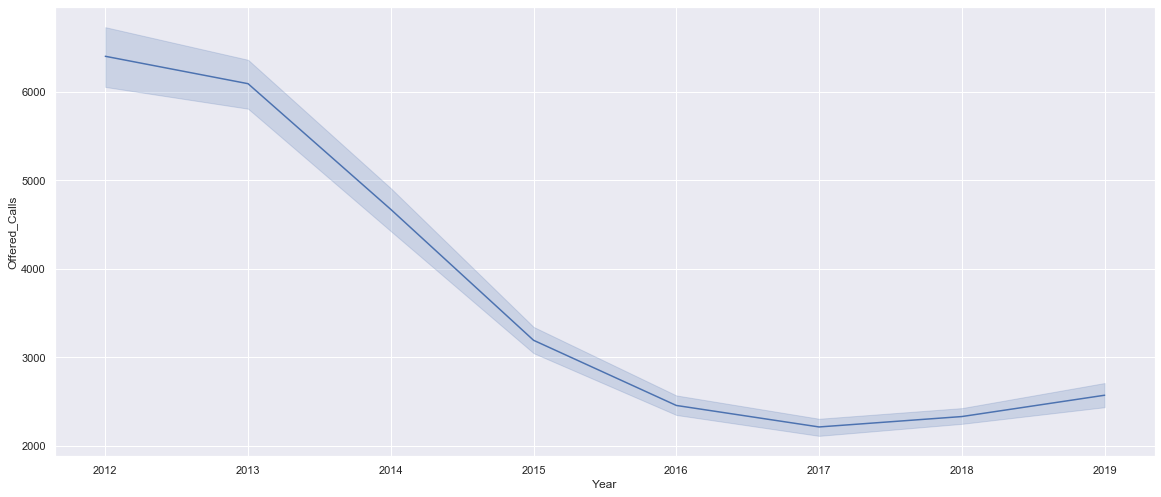

In [159]:
#Yearly Trend
sns.lineplot(df['Year'],df['Offered_Calls'])

In [160]:
df=df[df['Offered_Calls']<8837]

In [161]:
df["Date"] = pd.to_datetime(df["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [162]:
df_mon=df[(df['Date'] > '2013-01-01')]

In [164]:
df_mon.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights,SpecialDay,Weekend
276,2013-01-02,8391.004509,2013,1,2,2,1.107,1,0
277,2013-01-03,8703.374925,2013,1,3,3,1.069,1,0
278,2013-01-04,8584.261905,2013,1,4,4,1.037,0,0
279,2013-01-05,3798.906593,2013,1,5,5,0.991,0,1
280,2013-01-06,2083.147102,2013,1,6,6,0.971,0,1


## Using Predictive Model

In [181]:
#Breaking the data and selecting features , predictors
from sklearn.model_selection import train_test_split
predictors=df_mon.drop(['Offered_Calls','Date'],axis=1)
target=df_mon['Offered_Calls']
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.2,random_state=42)

In [182]:
#Comparing Algorithms
def scores(i):
    lin = i()
    lin.fit(x_train, y_train)
    y_pred=lin.predict(x_cv)
    lin_r= r2_score(y_cv, y_pred)
    s.append(lin_r)
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet]
s=[]
for i in algos:
    scores(i)

In [183]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegressor', 
              'RandomForestRegressor', 'Lasso'],
    'Score': [s[0],s[1],s[2],s[3]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
2,RandomForestRegressor,0.852260
0,LinearRegression,0.622707
3,Lasso,0.622545
1,KNeighborsRegressor,0.590208


In [184]:
#Hypertuned Model
model = RandomForestRegressor(oob_score = True,n_jobs =1,random_state =7,
                              max_features = "auto", min_samples_leaf =4)

In [185]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=True,
                      random_state=7, verbose=0, warm_start=False)

In [186]:
pred=model.predict(x_cv)

In [187]:
#R2 Score
r2_score(pred,y_cv)

0.8302229229047134

In [188]:
import numpy as np

def mean_absolute_percentage_error(y_cv, pred): 
    y_cv, pred = np.array(y_cv), np.array(pred)
    return np.mean(np.abs((y_cv - pred) / y_cv)) * 100

In [189]:
mean_absolute_percentage_error(y_cv, pred)

19.585186096128265

In [190]:
test.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights,SpecialDay,Weekend
0,2019-09-30,3943.290506,2019,40,30,0,1.172,1,0
1,2019-10-01,4086.761718,2019,40,1,1,1.176,1,0
2,2019-10-02,3281.195880,2019,40,2,2,1.107,1,0
3,2019-10-03,3271.589249,2019,40,3,3,1.069,1,0
4,2019-10-04,3211.593147,2019,40,4,4,1.037,0,0


In [191]:
test.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights,SpecialDay,Weekend
0,2019-09-30,3943.290506,2019,40,30,0,1.172,1,0
1,2019-10-01,4086.761718,2019,40,1,1,1.176,1,0
2,2019-10-02,3281.195880,2019,40,2,2,1.107,1,0
3,2019-10-03,3271.589249,2019,40,3,3,1.069,1,0
4,2019-10-04,3211.593147,2019,40,4,4,1.037,0,0


In [192]:
test1=test.drop(['Offered_Calls','Date'],axis=1)

In [193]:
pred2=model.predict(test1)

In [194]:
test['Offered_Calls']=pred2

In [195]:
test.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights,SpecialDay,Weekend
0,2019-09-30,3943.290506,2019,40,30,0,1.172,1,0
1,2019-10-01,4086.761718,2019,40,1,1,1.176,1,0
2,2019-10-02,3281.195880,2019,40,2,2,1.107,1,0
3,2019-10-03,3271.589249,2019,40,3,3,1.069,1,0
4,2019-10-04,3211.593147,2019,40,4,4,1.037,0,0


In [180]:
result=df[['Date','Offered_Calls']]

In [107]:
result.to_csv('finalresult.csv')